In [244]:
import sys

# Data processing
import numpy as np
import pandas as pd
import scipy as sp

# For visulalization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

import seaborn as sns

from pandas.tools.plotting import scatter_matrix

import IPython
from IPython import display

# For Modeling
import sklearn

#misc libraries
import timeit
import random
import time
import copy
from imp import reload

print('Starting time: {0}'.format(time.asctime() ))
print('\nPython version in use is {0}'.format(sys.version))
print("NumPy version: {}". format(np.__version__))
print("pandas version: {}". format(pd.__version__))
print("SciPy version: {}". format(sp.__version__)) 

print("matplotlib version: {}". format(mpl.__version__))
print("seaborn version: {}". format(sns.__version__))
print("IPython version: {}". format(IPython.__version__)) 

print("scikit-learn version: {}". format(sklearn.__version__))
print("\nBasic Libraries loaded\n" + '-'*25 )

Starting time: Sun Jul 22 16:09:32 2018

Python version in use is 3.6.1 |Anaconda custom (x86_64)| (default, May 11 2017, 13:04:09) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
NumPy version: 1.12.1
pandas version: 0.20.3
SciPy version: 1.1.0
matplotlib version: 2.0.2
seaborn version: 0.8.0
IPython version: 5.3.0
scikit-learn version: 0.19.1

Basic Libraries loaded
-------------------------


In [245]:
# Common Model Algorithms
from sklearn import dummy, linear_model, tree, ensemble, svm, neighbors, naive_bayes, discriminant_analysis, gaussian_process

# Common Model helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn import feature_selection
from sklearn import model_selection
# from sklearn.pipeline import Pipeline  # SSR: two pipelines imported
from sklearn.pipeline import make_pipeline
from sklearn import metrics

# Stacking
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

# Sampling
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.metrics import (geometric_mean_score, make_index_balanced_accuracy )
from imblearn.pipeline import Pipeline # SSR: two pipelines imported

# XGboost
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
import lightgbm as lgb
from lightgbm.sklearn import LGBMClassifier

print("\nData Model Libraries loaded\n" + '-'*25 )


Data Model Libraries loaded
-------------------------


In [246]:
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.options.display.max_columns = 300
pd.options.display.max_colwidth = 200
print("\nDisplay settings completed\n" + '-'*25 )

# Ignore warnings
import  warnings
warnings.filterwarnings('ignore')
print("\nWarnings are ignored\n" + '-'*25 )

# Misc settings
rand_st = 101
cust_n_jobs = -1
sys.path.append('/Users/Shankar/PGMS/PYTHON/code/Common_lib')
import ssr_eda_analysis
reload(ssr_eda_analysis)


Display settings completed
-------------------------

Warnings are ignored
-------------------------
Starting time: Sun Jul 22 16:09:36 2018

Python version in use is 3.6.1 |Anaconda custom (x86_64)| (default, May 11 2017, 13:04:09) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
NumPy version: 1.12.1
pandas version: 0.20.3
SciPy version: 1.1.0
matplotlib version: 2.0.2
seaborn version: 0.8.0
IPython version: 5.3.0
scikit-learn version: 0.19.1

Basic Libraries loaded
-------------------------
ssr_eda_analysis Running as Module


<module 'ssr_eda_analysis' from '/Users/Shankar/PGMS/PYTHON/code/Common_lib/ssr_eda_analysis.py'>

In [247]:
## Read the data
data_path = '/Users/Shankar/PGMS/PYTHON/data/AV/Mckinsey_Insurance/'
to_rename_cols = {'perc_premium_paid_by_cash_credit' : 'prem_paid_perc',
                 'Count_3-6_months_late' : 'six_mth_late_cnt',
                  'Count_6-12_months_late' : 'twelve_mth_late_cnt',
                  'Count_more_than_12_months_late' : 'year_mth_late_cnt',
                 'application_underwriting_score' : 'appl_underwrite_score'}

train_raw_data = pd.read_csv(data_path + 'train_ZoGVYWq.csv').rename(columns=to_rename_cols)
test_raw_data = pd.read_csv(data_path + 'test_66516Ee.csv').rename(columns=to_rename_cols)

train_df = train_raw_data.copy(deep=True)
test_df = test_raw_data.copy(deep=True)

train_df.info()
test_df.info()

train_df.head(5)
pd.DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 13 columns):
id                       79853 non-null int64
prem_paid_perc           79853 non-null float64
age_in_days              79853 non-null int64
Income                   79853 non-null int64
six_mth_late_cnt         79756 non-null float64
twelve_mth_late_cnt      79756 non-null float64
year_mth_late_cnt        79756 non-null float64
appl_underwrite_score    76879 non-null float64
no_of_premiums_paid      79853 non-null int64
sourcing_channel         79853 non-null object
residence_area_type      79853 non-null object
premium                  79853 non-null int64
renewal                  79853 non-null int64
dtypes: float64(5), int64(6), object(2)
memory usage: 7.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34224 entries, 0 to 34223
Data columns (total 12 columns):
id                       34224 non-null int64
prem_paid_perc           34224 non-null float64
age_in_days     

,id,prem_paid_perc,age_in_days,Income,six_mth_late_cnt,twelve_mth_late_cnt,year_mth_late_cnt,appl_underwrite_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1


pandas.core.frame.DataFrame

## EDA 

In [248]:
analyze_data_df = ssr_eda_analysis.ssr_get_summary(train_df)
analyze_data_df.sort_values(by='num_nulls', ascending=False)

analyze_data_df = ssr_eda_analysis.ssr_get_summary(test_df)
analyze_data_df.sort_values(by='num_nulls', ascending=False)

,colname,dtype,Top_10,Num_Uniques,num_nulls,null_percent,LV_nunique_in_%,LV_freq_cnt_1_2,LV_freq_val_1_2
colname,,,,,,,,,
appl_underwrite_score,appl_underwrite_score,float64,"[99.89, 99.88, 99.87, 99.86, 99.3, 99.38, 99.31, 99.28, 99.37, 99.23]",672,2974,3.72,1.0,68.0,1.000100
six_mth_late_cnt,six_mth_late_cnt,float64,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]",14,97,0.12,0.0,13.0,0.000000
twelve_mth_late_cnt,twelve_mth_late_cnt,float64,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]",17,97,0.12,0.0,4.0,0.000000
year_mth_late_cnt,year_mth_late_cnt,float64,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 11.0]",10,97,0.12,0.0,4.0,0.000000
id,id,int64,"[114076, 38175, 38165, 38166, 38168, 38169, 38170, 38173, 38174, 38176]",79853,0,0.00,100.0,100.0,1.036819
prem_paid_perc,prem_paid_perc,float64,"[0.0, 1.0, 0.001, 0.002, 0.003, 0.004, 0.006, 0.005, 0.01, 0.008]",1001,0,0.00,1.0,87.0,0.000000
age_in_days,age_in_days,int64,"[17899, 16802, 17895, 17163, 16801, 19350, 18261, 17894, 19358, 17528]",833,0,0.00,1.0,99.0,1.065290
Income,Income,int64,"[150130, 150060, 150090, 150120, 150050, 150100, 150070, 150110, 150030, 150080]",24165,0,0.00,30.0,95.0,1.000466
no_of_premiums_paid,no_of_premiums_paid,int64,"[8, 9, 10, 7, 11, 6, 12, 13, 5, 14]",57,0,0.00,0.0,100.0,0.888889


,colname,dtype,Top_10,Num_Uniques,num_nulls,null_percent,LV_nunique_in_%,LV_freq_cnt_1_2,LV_freq_val_1_2
colname,,,,,,,,,
appl_underwrite_score,appl_underwrite_score,float64,"[99.89, 99.88, 99.87, 99.32, 99.46, 99.18, 99.23, 99.86, 99.28, 99.35]",564,1323,3.87,2.0,69.0,1.000100
six_mth_late_cnt,six_mth_late_cnt,float64,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]",12,31,0.09,0.0,13.0,0.000000
twelve_mth_late_cnt,twelve_mth_late_cnt,float64,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 9.0, 7.0, 8.0]",11,31,0.09,0.0,3.0,0.000000
year_mth_late_cnt,year_mth_late_cnt,float64,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]",8,31,0.09,0.0,4.0,0.000000
id,id,int64,"[14364, 85662, 85639, 20104, 85641, 85642, 20109, 85646, 31630, 85648]",34224,0,0.00,100.0,100.0,0.858597
prem_paid_perc,prem_paid_perc,float64,"[0.0, 1.0, 0.001, 0.002, 0.005, 0.004, 0.006, 0.003, 0.007, 0.009]",1001,0,0.00,3.0,90.0,0.000000
age_in_days,age_in_days,int64,"[18255, 18620, 17170, 18264, 18626, 17530, 16436, 17892, 18259, 17532]",809,0,0.00,2.0,96.0,0.999507
Income,Income,int64,"[150080, 150040, 150110, 150120, 150100, 150090, 150050, 150140, 150150, 150070]",14402,0,0.00,42.0,85.0,1.000267
no_of_premiums_paid,no_of_premiums_paid,int64,"[9, 8, 10, 7, 11, 6, 12, 13, 5, 14]",52,0,0.00,0.0,99.0,1.125000


Counter({0: 4998, 1: 74855})

1    0.93741
0    0.06259
Name: renewal, dtype: float64

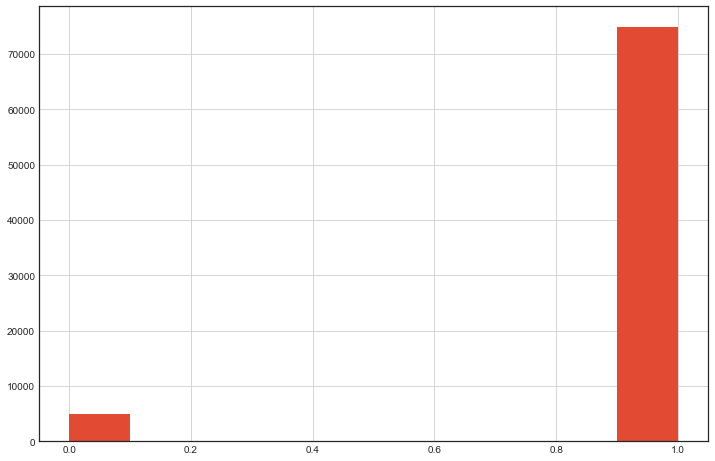

In [249]:
### Check target column
train_df['renewal'].hist()
Counter(train_df['renewal'])
train_df['renewal'].value_counts(normalize=True)

In [250]:
# ###--------------------
# ### Null value handling
# ###--------------------
# train_df.groupby(['premium'].value_counts()

# temp_missing_appl_score_dict
                 
# ## Since 3% of appl score is missing and most values are higher, just using the median score
# # train_appl_median_score = train_df['appl_underwrite_score'].median()
# # test_appl_median_score = test_df['appl_underwrite_score'].median()

# train_df['appl_underwrite_score'].fillna(train_appl_median_score, inplace=True)
# test_df['appl_underwrite_score'] = test_df['appl_underwrite_score'].fillna(test_appl_median_score)

# ## NULL has Less than 0.5% are missing late counts, so for time being going to drop those as I think this is important fields
# train_df['six_mth_late_cnt'].value_counts()
# train_df.loc[train_df['six_mth_late_cnt'].isnull() ,'renewal'].value_counts(normalize=True) 
# train_df.dropna(inplace=True)

# ##Missing cnt in train_df is not renewing 60%, so assign median values to missing CNT in test dataset
# test_df['six_mth_late_cnt'].fillna(test_df['six_mth_late_cnt'].median(), inplace=True)
# test_df['twelve_mth_late_cnt'].fillna(test_df['twelve_mth_late_cnt'].median(), inplace=True)
# test_df['year_mth_late_cnt'].fillna(test_df['year_mth_late_cnt'].median(), inplace=True)

#-----------------------------------
###--------------------
### Null value handling
###--------------------
train_df.appl_underwrite_score.value_counts()

train_df['appl_underwrite_score'].fillna(-1, inplace=True)
test_df['appl_underwrite_score'].fillna(-1, inplace=True)

##Missing cnt in train_df is not renewing 60%, so assign median values to missing CNT in test dataset
train_df['six_mth_late_cnt'].fillna(-1, inplace=True)
train_df['twelve_mth_late_cnt'].fillna(-1, inplace=True)
train_df['year_mth_late_cnt'].fillna(-1, inplace=True)

test_df['six_mth_late_cnt'].fillna(-1, inplace=True)
test_df['twelve_mth_late_cnt'].fillna(-1, inplace=True)
test_df['year_mth_late_cnt'].fillna(-1, inplace=True)

## Checks
train_df.isnull().sum().sum()
test_df.isnull().sum().sum()

99.89    1972
99.88    1343
99.87     856
99.86     693
99.30     642
99.38     633
99.31     623
99.28     617
99.37     616
99.23     614
99.42     610
99.25     608
99.36     607
99.32     604
99.22     602
99.19     602
99.26     601
99.27     600
99.18     599
99.52     598
99.43     598
99.35     598
99.46     592
99.29     592
99.17     591
99.47     590
99.33     588
99.34     586
99.39     585
99.11     582
         ... 
94.44       1
93.37       1
92.42       1
92.97       1
95.81       1
92.24       1
92.26       1
93.91       1
93.14       1
92.78       1
94.41       1
93.57       1
92.54       1
94.38       1
93.72       1
95.26       1
94.09       1
95.44       1
92.61       1
93.97       1
94.81       1
92.50       1
95.01       1
94.66       1
94.13       1
92.36       1
92.58       1
93.22       1
93.78       1
95.32       1
Name: appl_underwrite_score, Length: 672, dtype: int64

0

0

In [251]:
train_df.head()
# train_df['appl_underwrite_score'].value_counts()

### Sourcing channel
train_df['sourcing_channel'].value_counts()
train_df.groupby(['sourcing_channel']).agg({'renewal' : sum, 'sourcing_channel': 'count' })
# var = train_df.groupby(['sourcing_channel','renewal']).renewal.count()
# var.unstack().plot(kind='bar',stacked=True,  color=['red','blue'], grid=False)
# plt.title('Sourcing Channel Vs Renewals')

### Income  -- create 10 ranges
print('Income range is:  {0} to {1}'.format(min(train_df['Income']),  max(train_df['Income']) ))
# pd.cut(train_df.Income,bins=5)

### Premium  -- create 10 ranges
print('premium range is:  {0} to {1}'.format(min(train_df['premium']),  max(train_df['premium']) ))
# pd.cut(train_df.Income,bins=5)

# label_encoder = LabelEncoder()
# train_df['temp_1'] = label_encoder.fit_transform(pd.cut(train_df['Income'], bins=10))
# train_df.loc[train_df['temp_1'] == 1, :]
# train_df.groupby(['temp_1']).Income.min()
# train_df.groupby(['temp_1']).Income.max()



,id,prem_paid_perc,age_in_days,Income,six_mth_late_cnt,twelve_mth_late_cnt,year_mth_late_cnt,appl_underwrite_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1


A    43134
B    16512
C    12039
D     7559
E      609
Name: sourcing_channel, dtype: int64

,renewal,sourcing_channel
sourcing_channel,,
A,40785,43134
B,15446,16512
C,11136,12039
D,6925,7559
E,563,609


Income range is:  24030 to 90262600
premium range is:  1200 to 60000


In [103]:
train_df.head()

,id,prem_paid_perc,age_in_days,Income,six_mth_late_cnt,twelve_mth_late_cnt,year_mth_late_cnt,appl_underwrite_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1


In [252]:
### Handling categorical variables
train_df = pd.get_dummies(data=train_df, prefix='area_type',columns=['residence_area_type'], drop_first=True)
train_df = pd.get_dummies(data=train_df, prefix='channel',columns=['sourcing_channel'], drop_first=True)
train_df.head()

test_df = pd.get_dummies(data=test_df, prefix='area_type',columns=['residence_area_type'], drop_first=True)
test_df = pd.get_dummies(data=test_df, prefix='channel',columns=['sourcing_channel'], drop_first=True)
test_df.head()

,id,prem_paid_perc,age_in_days,Income,six_mth_late_cnt,twelve_mth_late_cnt,year_mth_late_cnt,appl_underwrite_score,no_of_premiums_paid,premium,renewal,area_type_Urban,channel_B,channel_C,channel_D,channel_E
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,3300,1,1,0,1,0,0
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,18000,1,1,0,0,0,0
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,3300,0,0,0,1,0,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,9600,1,1,0,0,0,0
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,9600,1,1,1,0,0,0


,id,prem_paid_perc,age_in_days,Income,six_mth_late_cnt,twelve_mth_late_cnt,year_mth_late_cnt,appl_underwrite_score,no_of_premiums_paid,premium,area_type_Urban,channel_B,channel_C,channel_D,channel_E
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,3300,0,0,0,0,0
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,11700,1,0,0,0,0
2,70762,1.000,17170,186030,0.0,0.0,0.0,-1.00,2,11700,1,1,0,0,0
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,5400,0,1,0,0,0
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,9600,0,0,0,0,0


In [253]:
### Normalizing the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

# train_scaled_income = scaler.fit_transform(train_df['Income'].reshape(-1,1))
# test_scaled_income = scaler.transform(test_df['Income'].reshape(-1,1))
# train_df['scaled_Income'] = train_scaled_income
# test_df['scaled_Income'] = test_scaled_income

## Income
train_df['scaled_Income'] = scaler.fit_transform(train_df['Income'].reshape(-1,1))
test_df['scaled_Income'] = scaler.transform(test_df['Income'].reshape(-1,1))

## Premium
train_df['scaled_premium'] = scaler.fit_transform(train_df['premium'].reshape(-1,1))
test_df['scaled_premium'] = scaler.transform(test_df['premium'].reshape(-1,1))

## appl_underwrite_score
train_df['scaled_appl_score'] = scaler.fit_transform(train_df['appl_underwrite_score'].reshape(-1,1))
test_df['scaled_appl_score'] = scaler.transform(test_df['appl_underwrite_score'].reshape(-1,1))



train_df.head()

,id,prem_paid_perc,age_in_days,Income,six_mth_late_cnt,twelve_mth_late_cnt,year_mth_late_cnt,appl_underwrite_score,no_of_premiums_paid,premium,renewal,area_type_Urban,channel_B,channel_C,channel_D,channel_E,scaled_Income,scaled_premium,scaled_appl_score
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,3300,1,1,0,1,0,0,0.003668,0.035714,0.991377
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,18000,1,1,0,0,0,0,0.003226,0.285714,1.000000
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,3300,0,0,0,1,0,0,0.000666,0.035714,0.988106
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,9600,1,1,0,0,0,0,0.002510,0.142857,0.996828
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,9600,1,1,1,0,0,0,0.001935,0.142857,0.999802


In [254]:
### Combine datasets for easy processing
train_df_cnt = train_df.shape[0]
test_df_cnt = test_df.shape[0]

info_all_df = pd.concat([train_df, test_df],axis=0)

print('{0} {1} {2}'.format(train_df_cnt, test_df_cnt, info_all_df.shape[0]))

79853 34224 114077


## Feature engineering

In [255]:
### Age 
info_all_df['Age_yrs'] = round(info_all_df['age_in_days']/365).astype('int')

## Age scaling
info_all_df['scaled_Age_yrs'] = scaler.fit_transform(info_all_df['Age_yrs'].reshape(-1,1))

### Premium %
info_all_df['premium_perc'] = info_all_df['premium']/info_all_df['Income']

### total late counts
info_all_df['total_late_cnt'] = (info_all_df['six_mth_late_cnt']+info_all_df['twelve_mth_late_cnt']+info_all_df['year_mth_late_cnt']).astype('int')
info_all_df['total_late_cnt'] = info_all_df['total_late_cnt'].apply(lambda x: x if x > 0 else 0) ##Missing values is -1

### Policy age
info_all_df['policy_age_mth'] = info_all_df['total_late_cnt'] + info_all_df['no_of_premiums_paid']

### Policy crossed an year
info_all_df['policy_yr_old'] = info_all_df['policy_age_mth'].apply(lambda x: 1 if x >= 12 else 0)

### Policy late pcnt
info_all_df['policy_late_pcnt'] = info_all_df['total_late_cnt'] / info_all_df['policy_age_mth']

### Age bands
label_encoder = LabelEncoder()
info_all_df['age_bands'] = label_encoder.fit_transform(pd.cut(info_all_df['Age_yrs'],bins=10))

### Income bands
label_encoder = LabelEncoder()
info_all_df['Income_bands'] = label_encoder.fit_transform(pd.cut(info_all_df['Income'],bins=10))

### premium bands
label_encoder = LabelEncoder()
info_all_df['premium_bands'] = label_encoder.fit_transform(pd.cut(info_all_df['premium'],bins=10))


info_all_df.head()

,Income,age_in_days,appl_underwrite_score,area_type_Urban,channel_B,channel_C,channel_D,channel_E,id,no_of_premiums_paid,prem_paid_perc,premium,renewal,scaled_Income,scaled_appl_score,scaled_premium,six_mth_late_cnt,twelve_mth_late_cnt,year_mth_late_cnt,Age_yrs,scaled_Age_yrs,premium_perc,total_late_cnt,policy_age_mth,policy_yr_old,policy_late_pcnt,age_bands,Income_bands,premium_bands
0,355060,12058,99.02,1,0,1,0,0,110936,13,0.429,3300,1.0,0.003668,0.991377,0.035714,0.0,0.0,0.0,33,0.146341,0.009294,0,13,1,0.000000,1,0,0
1,315150,21546,99.89,1,0,0,0,0,41492,21,0.010,18000,1.0,0.003226,1.000000,0.285714,0.0,0.0,0.0,59,0.463415,0.057116,0,21,1,0.000000,4,0,2
2,84140,17531,98.69,0,0,1,0,0,31300,7,0.917,3300,0.0,0.000666,0.988106,0.035714,2.0,3.0,1.0,48,0.329268,0.039220,6,13,1,0.461538,3,0,0
3,250510,15341,99.57,1,0,0,0,0,19415,9,0.049,9600,1.0,0.002510,0.996828,0.142857,0.0,0.0,0.0,42,0.256098,0.038322,0,9,0,0.000000,2,0,1
4,198680,31400,99.87,1,1,0,0,0,99379,12,0.052,9600,1.0,0.001935,0.999802,0.142857,0.0,0.0,0.0,86,0.792683,0.048319,0,12,1,0.000000,7,0,1


In [112]:
# info_all_df['Age_yrs'].value_counts().sort_index()


# def encode_with_LabelEncoder(df, column_name):
#     label_encoder = LabelEncoder()
#     label_encoder.fit(df[column_name])
#     df[column_name+'_le'] = label_encoder.transform(df[column_name])
#     return label_encoder



,Income,age_in_days,appl_underwrite_score,area_type_Urban,channel_B,channel_C,channel_D,channel_E,id,no_of_premiums_paid,prem_paid_perc,premium,renewal,scaled_Income,scaled_appl_score,scaled_premium,six_mth_late_cnt,twelve_mth_late_cnt,year_mth_late_cnt,Age_yrs,scaled_Age_yrs,premium_perc,total_late_cnt,policy_age_mth,policy_late_pcnt,age_bands,age_bands_enc
0,355060,12058,99.02,1,0,1,0,0,110936,13,0.429,3300,1.0,0.003668,0.891114,0.035714,0.0,0.0,0.0,33,0.146341,1,0,13,0.000000,"(31.25, 36.375]",2
1,315150,21546,99.89,1,0,0,0,0,41492,21,0.010,18000,1.0,0.003226,1.000000,0.285714,0.0,0.0,0.0,59,0.463415,6,0,21,0.000000,"(56.875, 62.0]",7
2,84140,17531,98.69,0,0,1,0,0,31300,7,0.917,3300,0.0,0.000666,0.849812,0.035714,2.0,3.0,1.0,48,0.329268,4,6,13,0.461538,"(46.625, 51.75]",5
3,250510,15341,99.57,1,0,0,0,0,19415,9,0.049,9600,1.0,0.002510,0.959950,0.142857,0.0,0.0,0.0,42,0.256098,4,0,9,0.000000,"(41.5, 46.625]",4
4,198680,31400,99.87,1,1,0,0,0,99379,12,0.052,9600,1.0,0.001935,0.997497,0.142857,0.0,0.0,0.0,86,0.792683,5,0,12,0.000000,"(82.5, 87.625]",12


### Missing values adjustment for models

In [256]:
temp_df = pd.DataFrame(info_all_df.groupby(['premium_bands']).agg({'appl_underwrite_score': 'median'}))
temp_df.columns = ['appl_underwrite_score_median']
temp_missing_appl_score_dict  = dict(zip(temp_df.index, temp_df.appl_underwrite_score_median))
temp_missing_appl_score_dict.items()

temp_missing_appl_score_dict[1]

info_all_df['appl_underwrite_score'] = info_all_df[['appl_underwrite_score', 'premium_bands']].apply((lambda x: x['appl_underwrite_score'] if x['appl_underwrite_score'] > 0 else temp_missing_appl_score_dict[x['premium_bands']]), 
                                                                                                         axis=1)
info_all_df['six_mth_late_cnt'] = info_all_df['six_mth_late_cnt'].apply(lambda x: x if x > 0 else 0)
info_all_df['twelve_mth_late_cnt'] = info_all_df['twelve_mth_late_cnt'].apply(lambda x: x if x > 0 else 0)
info_all_df['year_mth_late_cnt'] = info_all_df['year_mth_late_cnt'].apply(lambda x: x if x > 0 else 0)

info_all_df.loc[info_all_df['appl_underwrite_score'] == -1, :]
info_all_df.loc[info_all_df['twelve_mth_late_cnt'] == -1, :]

dict_items([(0, 99.120000000000005), (1, 99.159999999999997), (2, 99.209999999999994), (3, 99.239999999999995), (4, 99.269999999999996), (5, 99.310000000000002), (6, 99.319999999999993), (7, 99.340000000000003), (8, 99.359999999999999), (9, 99.560000000000002)])

99.159999999999997

,Income,age_in_days,appl_underwrite_score,area_type_Urban,channel_B,channel_C,channel_D,channel_E,id,no_of_premiums_paid,prem_paid_perc,premium,renewal,scaled_Income,scaled_appl_score,scaled_premium,six_mth_late_cnt,twelve_mth_late_cnt,year_mth_late_cnt,Age_yrs,scaled_Age_yrs,premium_perc,total_late_cnt,policy_age_mth,policy_yr_old,policy_late_pcnt,age_bands,Income_bands,premium_bands


,Income,age_in_days,appl_underwrite_score,area_type_Urban,channel_B,channel_C,channel_D,channel_E,id,no_of_premiums_paid,prem_paid_perc,premium,renewal,scaled_Income,scaled_appl_score,scaled_premium,six_mth_late_cnt,twelve_mth_late_cnt,year_mth_late_cnt,Age_yrs,scaled_Age_yrs,premium_perc,total_late_cnt,policy_age_mth,policy_yr_old,policy_late_pcnt,age_bands,Income_bands,premium_bands


## Model

In [261]:
## SElect requierd columns
id_col = 'id'
target_col = 'renewal'
to_drop_col = [id_col, target_col, 'age_in_days', 'residence_area_type', 'sourcing_channel',  
                'scaled_Income', 'scaled_premium', 'scaled_Age_yrs', 'scaled_appl_score']
# to_drop_col = [id_col, target_col, 
#                 'scaled_Income', 'scaled_premium', 'scaled_Age_yrs', 'scaled_appl_score'
               
#               ] 

predictors = [col for col in train_df.columns if col not in to_drop_col]
predictors
info_all_df[predictors].head()

## Time to split train and test datasets
train_df = info_all_df.iloc[:train_df_cnt]
test_df = info_all_df.iloc[train_df_cnt:]

train_df.info()
test_df.info()

train_df.head()
test_df.head()

## WRite train and test datasets
train_df.to_csv(data_path + 'base_train_df.csv', index=False, header=True)
test_df.to_csv(data_path + 'base_test_df.csv', index=False, header=True)


## Train/val splits
X_train_all, X_val_all, y_train, y_val = model_selection.train_test_split(train_df, 
                                                                    train_df[target_col], test_size=0.2, random_state=rand_st)

X_train = X_train_all[predictors]
X_val = X_val_all[predictors]
X_test = test_df[predictors]

['Income',
 'appl_underwrite_score',
 'area_type_Urban',
 'channel_B',
 'channel_C',
 'channel_D',
 'channel_E',
 'no_of_premiums_paid',
 'prem_paid_perc',
 'premium',
 'six_mth_late_cnt',
 'twelve_mth_late_cnt',
 'year_mth_late_cnt',
 'Age_yrs',
 'premium_perc',
 'total_late_cnt',
 'policy_age_mth',
 'policy_yr_old',
 'policy_late_pcnt',
 'age_bands',
 'Income_bands',
 'premium_bands']

,Income,appl_underwrite_score,area_type_Urban,channel_B,channel_C,channel_D,channel_E,no_of_premiums_paid,prem_paid_perc,premium,six_mth_late_cnt,twelve_mth_late_cnt,year_mth_late_cnt,Age_yrs,premium_perc,total_late_cnt,policy_age_mth,policy_yr_old,policy_late_pcnt,age_bands,Income_bands,premium_bands
0,355060,99.02,1,0,1,0,0,13,0.429,3300,0.0,0.0,0.0,33,0.009294,0,13,1,0.000000,1,0,0
1,315150,99.89,1,0,0,0,0,21,0.010,18000,0.0,0.0,0.0,59,0.057116,0,21,1,0.000000,4,0,2
2,84140,98.69,0,0,1,0,0,7,0.917,3300,2.0,3.0,1.0,48,0.039220,6,13,1,0.461538,3,0,0
3,250510,99.57,1,0,0,0,0,9,0.049,9600,0.0,0.0,0.0,42,0.038322,0,9,0,0.000000,2,0,1
4,198680,99.87,1,1,0,0,0,12,0.052,9600,0.0,0.0,0.0,86,0.048319,0,12,1,0.000000,7,0,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 79853 entries, 0 to 79852
Data columns (total 29 columns):
Income                   79853 non-null int64
age_in_days              79853 non-null int64
appl_underwrite_score    79853 non-null float64
area_type_Urban          79853 non-null uint8
channel_B                79853 non-null uint8
channel_C                79853 non-null uint8
channel_D                79853 non-null uint8
channel_E                79853 non-null uint8
id                       79853 non-null int64
no_of_premiums_paid      79853 non-null int64
prem_paid_perc           79853 non-null float64
premium                  79853 non-null int64
renewal                  79853 non-null float64
scaled_Income            79853 non-null float64
scaled_appl_score        79853 non-null float64
scaled_premium           79853 non-null float64
six_mth_late_cnt         79853 non-null float64
twelve_mth_late_cnt      79853 non-null float64
year_mth_late_cnt        79853 non-null float64

,Income,age_in_days,appl_underwrite_score,area_type_Urban,channel_B,channel_C,channel_D,channel_E,id,no_of_premiums_paid,prem_paid_perc,premium,renewal,scaled_Income,scaled_appl_score,scaled_premium,six_mth_late_cnt,twelve_mth_late_cnt,year_mth_late_cnt,Age_yrs,scaled_Age_yrs,premium_perc,total_late_cnt,policy_age_mth,policy_yr_old,policy_late_pcnt,age_bands,Income_bands,premium_bands
0,355060,12058,99.02,1,0,1,0,0,110936,13,0.429,3300,1.0,0.003668,0.991377,0.035714,0.0,0.0,0.0,33,0.146341,0.009294,0,13,1,0.000000,1,0,0
1,315150,21546,99.89,1,0,0,0,0,41492,21,0.010,18000,1.0,0.003226,1.000000,0.285714,0.0,0.0,0.0,59,0.463415,0.057116,0,21,1,0.000000,4,0,2
2,84140,17531,98.69,0,0,1,0,0,31300,7,0.917,3300,0.0,0.000666,0.988106,0.035714,2.0,3.0,1.0,48,0.329268,0.039220,6,13,1,0.461538,3,0,0
3,250510,15341,99.57,1,0,0,0,0,19415,9,0.049,9600,1.0,0.002510,0.996828,0.142857,0.0,0.0,0.0,42,0.256098,0.038322,0,9,0,0.000000,2,0,1
4,198680,31400,99.87,1,1,0,0,0,99379,12,0.052,9600,1.0,0.001935,0.999802,0.142857,0.0,0.0,0.0,86,0.792683,0.048319,0,12,1,0.000000,7,0,1


,Income,age_in_days,appl_underwrite_score,area_type_Urban,channel_B,channel_C,channel_D,channel_E,id,no_of_premiums_paid,prem_paid_perc,premium,renewal,scaled_Income,scaled_appl_score,scaled_premium,six_mth_late_cnt,twelve_mth_late_cnt,year_mth_late_cnt,Age_yrs,scaled_Age_yrs,premium_perc,total_late_cnt,policy_age_mth,policy_yr_old,policy_late_pcnt,age_bands,Income_bands,premium_bands
0,51150,27384,99.89,0,0,0,0,0,649,7,0.001,3300,NaN,0.000301,1.000000,0.035714,0.0,0.0,0.0,75,0.658537,0.064516,0,7,0,0.000000,6,0,0
1,285140,23735,98.93,1,0,0,0,0,81136,19,0.124,11700,NaN,0.002894,0.990485,0.178571,0.0,0.0,0.0,65,0.536585,0.041032,0,19,1,0.000000,5,0,1
2,186030,17170,99.16,1,1,0,0,0,70762,2,1.000,11700,NaN,0.001795,0.000000,0.178571,0.0,0.0,0.0,47,0.317073,0.062893,0,2,0,0.000000,3,0,1
3,123540,16068,99.00,0,1,0,0,0,53935,11,0.198,5400,NaN,0.001103,0.991179,0.071429,0.0,0.0,0.0,44,0.280488,0.043711,0,11,0,0.000000,2,0,0
4,200020,10591,99.17,0,0,0,0,0,15476,14,0.041,9600,NaN,0.001950,0.992864,0.142857,1.0,0.0,0.0,29,0.097561,0.047995,1,15,1,0.066667,0,0,1


Training time for LogReg
LogReg --> Mean: 0.797 --> std: 0.008
Prediction time for LogReg


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=-2, penalty='l2', random_state=101,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Training time for RF
RF --> Mean: 1.000 --> std: 0.000
Prediction time for RF


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=-2, oob_score=True, random_state=101,
            verbose=0, warm_start=False)

Training time for AdaBoost
AdaBoost --> Mean: 0.940 --> std: 0.001
Prediction time for AdaBoost


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=101)

,MLA_name,MLA_params,MLA_Train_Accuracy_Mean,MLA_Test_Accuracy_Mean,MLA_Test_Accuracy_Min,MLA_Train_f1_Mean,MLA_Test_f1_Mean,MLA_Test_f1_Min,MLA_Train_roc_auc_Mean,MLA_Test_roc_auc_Mean,MLA_Test_roc_auc_Min,MLA_fit_time_Mean
0,LogReg,"{'C': 1.0, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'ovr', 'n_jobs': -2, 'penalty': 'l2', 'random_state': 101, 'sol...",0.796515,0.796187,0.787740,0.880860,0.880691,0.875060,0.833591,0.831985,0.831733,0.488714
1,RF,"{'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'm...",1.000000,0.939545,0.939453,1.000000,0.968635,0.968600,1.000000,0.819266,0.817369,3.244732
2,AdaBoost,"{'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': 101}",0.940249,0.939545,0.939198,0.968879,0.968511,0.968317,0.845228,0.832439,0.829707,1.125878


,id,y_actual,LogReg,RF,AdaBoost
33695,66538,1.0,0.251672,0.916667,0.511677
67950,79198,1.0,0.798880,0.993333,0.522262
40653,27453,1.0,0.685249,0.960000,0.517376
64709,66742,1.0,0.577564,0.996667,0.513429
74927,48381,1.0,0.747530,0.980000,0.520330
55317,55809,1.0,0.769008,0.980000,0.520415
42130,75621,1.0,0.457232,0.883333,0.512840
9654,60812,1.0,0.711677,0.983333,0.518192
41957,20295,1.0,0.807907,1.000000,0.520765
10326,90548,1.0,0.641014,0.940000,0.519296


<class 'pandas.core.frame.DataFrame'>
Int64Index: 34224 entries, 0 to 34223
Data columns (total 4 columns):
id          34224 non-null int64
LogReg      34224 non-null float64
RF          34224 non-null float64
AdaBoost    34224 non-null float64
dtypes: float64(3), int64(1)
memory usage: 1.3 MB


,id,LogReg,RF,AdaBoost
0,649,0.879060,0.986667,0.524438
1,81136,0.754240,0.963333,0.520737
2,70762,0.481103,0.843333,0.505850
3,53935,0.730330,0.986667,0.519816
4,15476,0.573108,0.950000,0.517788


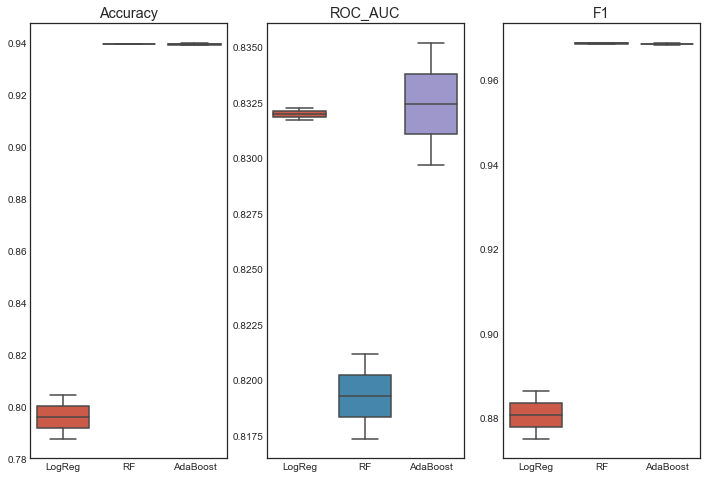

In [265]:
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier

MLA_predict = pd.DataFrame({'id':X_val_all['id'], 'y_actual' : y_val}) # Actual value for X_val
MLA_predict_Z = pd.DataFrame({'id':test_df['id'] })

MLA = [
#     dummy.DummyClassifier(strategy='most_frequent'),
    ('LogReg', linear_model.LogisticRegression(random_state=rand_st, penalty='l2', class_weight='balanced', n_jobs=-2) ) , 
#     ('KNN', Pipeline([('scaling', StandardScaler()), ('KNN', neighbors.KNeighborsClassifier())] ) ),
#     ('GNB', Pipeline([('scaling', StandardScaler()), ('GNB', naive_bayes.GaussianNB())] ) ),
#     ('DT', Pipeline([('scaling', StandardScaler()), ('DT',  tree.DecisionTreeClassifier())] ) ),
#     ('GPC', Pipeline([('scaling', StandardScaler()), ('GPC', gaussian_process.GaussianProcessClassifier())] ) ),
#    ('SVC', svm.SVC(kernel='linear', probability=True, class_weight='balanced', random_state=rand_st)),
    ('RF', ensemble.RandomForestClassifier(random_state=rand_st, class_weight='balanced',oob_score=True, n_estimators=300, n_jobs=-2)),
     ('AdaBoost', ensemble.AdaBoostClassifier(random_state=rand_st)) 
#      ('GradBoost', Pipeline([('scaling', StandardScaler()), ('GradBoost', ensemble.GradientBoostingClassifier(random_state=rand_st))] )),
]


#Cross validation
kfold = model_selection.StratifiedKFold(n_splits =2, shuffle=True, random_state=rand_st)

alg_names = []
alg_results_accuracy = []
alg_results_f1 = []
alg_results_auc = []
MLA_metrics = pd.DataFrame()

for idx, (name, alg) in enumerate(MLA):
#     mla_name = str(idx) + '_' + alg.__class__.__name__
    mla_name = name
    mla_params = str(alg.get_params())
    print('Training time for {0}'.format(mla_name))

    
    cv_results = model_selection.cross_validate(alg, X_train, y_train, cv=kfold, scoring=['accuracy','f1','roc_auc'])
    alg_results_accuracy.append(cv_results['test_accuracy'])
    alg_results_f1.append(cv_results['test_f1'])
    alg_results_auc.append(cv_results['test_roc_auc'])
    alg_names.append(mla_name)
    print('{0} --> Mean: {1:.3f} --> std: {2:.3f}'.format(mla_name, cv_results['train_accuracy'].mean(), cv_results['train_accuracy'].std()))
    
    MLA_metrics.loc[idx, 'MLA_name'] =  mla_name
#     MLA_metrics.loc[idx, 'MLA_object'] =  alg
    MLA_metrics.loc[idx, 'MLA_params'] =  mla_params
  
    MLA_metrics.loc[idx, 'MLA_Train_Accuracy_Mean'] =  cv_results['train_accuracy'].mean()
    MLA_metrics.loc[idx, 'MLA_Test_Accuracy_Mean'] =  cv_results['test_accuracy'].mean()
    MLA_metrics.loc[idx, 'MLA_Test_Accuracy_Min'] =  cv_results['test_accuracy'].min()

    MLA_metrics.loc[idx, 'MLA_Train_f1_Mean'] =  cv_results['train_f1'].mean()
    MLA_metrics.loc[idx, 'MLA_Test_f1_Mean'] =  cv_results['test_f1'].mean()
    MLA_metrics.loc[idx, 'MLA_Test_f1_Min'] =  cv_results['test_f1'].min()
    
    MLA_metrics.loc[idx, 'MLA_Train_roc_auc_Mean'] =  cv_results['train_roc_auc'].mean()
    MLA_metrics.loc[idx, 'MLA_Test_roc_auc_Mean'] =  cv_results['test_roc_auc'].mean()
    MLA_metrics.loc[idx, 'MLA_Test_roc_auc_Min'] =  cv_results['test_roc_auc'].min()

    MLA_metrics.loc[idx,  'MLA_fit_time_Mean'] = cv_results['fit_time'].mean()
    
    # Get pred results for each alg
    print('Prediction time for {0}'.format(mla_name))
    alg.fit(X_train, y_train)
    MLA_predict[mla_name] = alg.predict_proba(X_val)[:,1]
    MLA_predict_Z[mla_name] = alg.predict_proba(X_test)[:,1]
#     alg.predict_proba(X_test)
    
MLA_metrics
MLA_predict.loc[MLA_predict['y_actual'] >0, :]

## Alg comparisons
fig, axes = plt.subplots(nrows=1, ncols=3)
sns.boxplot(x=alg_names, y=alg_results_accuracy, ax=axes[0])
axes[0].set_title('Accuracy')
sns.boxplot(x=alg_names, y=alg_results_auc, ax=axes[1])
axes[1].set_title('ROC_AUC')
sns.boxplot(x=alg_names, y=alg_results_f1, ax=axes[2])
axes[2].set_title('F1')



MLA_predict_Z.info()
MLA_predict_Z.head(5)

In [ ]:
### Write submission files
subm_df = MLA_predict_Z[['id', 'LogReg']]
subm_df.columns = ['id', 'renewal']
subm_df['incentives'] = 0

subm_df.head()
subm_df.info()

# subm_df.to_csv(data_path + 'subm_base_no_incentives.csv', index=False)

In [231]:
### Get temp_missing_appl_score dict
info_all_df.groupby(['premium_bands']).agg({'appl_underwrite_score': 'median', 'six_mth_late_cnt': 'median',
                                           'twelve_mth_late_cnt': 'median', 'year_mth_late_cnt': 'median'})

temp_df = pd.DataFrame(info_all_df.groupby(['premium_bands']).agg({'appl_underwrite_score': 'median'}))
temp_df.columns = ['appl_underwrite_score_median']
temp_missing_appl_score_dict  = dict(zip(temp_df.index, temp_df.appl_underwrite_score_median))
temp_missing_appl_score_dict.items()

,appl_underwrite_score,six_mth_late_cnt,twelve_mth_late_cnt,year_mth_late_cnt
premium_bands,,,,
0,99.12,0.0,0.0,0.0
1,99.16,0.0,0.0,0.0
2,99.21,0.0,0.0,0.0
3,99.24,0.0,0.0,0.0
4,99.27,0.0,0.0,0.0
5,99.31,0.0,0.0,0.0
6,99.32,0.0,0.0,0.0
7,99.34,0.0,0.0,0.0
8,99.36,0.0,0.0,0.0


dict_items([(0, 99.120000000000005), (1, 99.159999999999997), (2, 99.209999999999994), (3, 99.239999999999995), (4, 99.269999999999996), (5, 99.310000000000002), (6, 99.319999999999993), (7, 99.340000000000003), (8, 99.359999999999999), (9, 99.560000000000002)])

## ensembling

In [276]:
# RF = ensemble.RandomForestClassifier(random_state=rand_st, class_weight='balanced',oob_score=True, n_estimators=300, n_jobs=-2))
# LogReg = linear_model.LogisticRegression(random_state=rand_st, penalty='l2', class_weight='balanced', n_jobs=-2) )


# alg.fit(X_train, y_train)
#     MLA_predict[mla_name] = alg.predict_proba(X_val)[:,1]
#     MLA_predict_Z[mla_name] = alg.predict_proba(X_test)[:,1]
    
ens_subm_LogReg_RF = pd.DataFrame()
for idx, curr_seed in enumerate(range(100,10000,357)):
    print('[{0}] Processing for seed: {1}'.format(idx, curr_seed))
    col_name = 'RF_{0}'.format(idx)
    if idx == 2:
        break
    RF = ensemble.RandomForestClassifier(max_depth = idx+6, random_state=curr_seed, class_weight='balanced',oob_score=True, n_estimators=300, n_jobs=-2)
    RF.fit(X_train, y_train)
    ens_subm_LogReg_RF[col_name] = RF.predict_proba(X_test)[:,1]
    
for idx, curr_seed in enumerate(range(100,10000,357)):
    print('[{0}] Processing for seed: {1}'.format(idx, curr_seed))
    col_name = 'LogReg_{0}'.format(idx)
    if idx == 3:
        break
    LogReg = linear_model.LogisticRegression(random_state=rand_st, penalty='l2', class_weight='balanced', n_jobs=-2) 
    LogReg.fit(X_train, y_train)
    ens_subm_LogReg_RF[col_name] = LogReg.predict_proba(X_test)[:,1]
    
ens_subm_LogReg_RF.head(20)

ens_subm_LogReg_RF.to_csv(data_path + 'day3_4_LogReg_RF_fullpred.csv', index=False)

[0] Processing for seed: 100


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=6, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=-2, oob_score=True, random_state=100,
            verbose=0, warm_start=False)

[1] Processing for seed: 457


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=7, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=-2, oob_score=True, random_state=457,
            verbose=0, warm_start=False)

[2] Processing for seed: 814
[0] Processing for seed: 100


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=-2, penalty='l2', random_state=101,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

[1] Processing for seed: 457


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=-2, penalty='l2', random_state=101,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

[2] Processing for seed: 814


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=-2, penalty='l2', random_state=101,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

[3] Processing for seed: 1171


,RF_0,RF_1,LogReg_0,LogReg_1,LogReg_2
0,0.859603,0.874984,0.879060,0.879060,0.879060
1,0.771441,0.776629,0.754240,0.754240,0.754240
2,0.344179,0.323172,0.481103,0.481103,0.481103
3,0.748179,0.765829,0.730330,0.730330,0.730330
4,0.490900,0.513642,0.573108,0.573108,0.573108
5,0.795643,0.816685,0.796223,0.796223,0.796223
6,0.291117,0.305170,0.054160,0.054160,0.054160
7,0.243418,0.243514,0.294110,0.294110,0.294110
8,0.881685,0.895588,0.832017,0.832017,0.832017
9,0.862384,0.878627,0.859507,0.859507,0.859507


In [279]:
def combine_avg_models(df):
    return np.mean(df, axis=1)

In [283]:
## COmbine LogReg, RF, XGB and LGB predictions
df1 = pd.read_csv(data_path + 'day3_3_xgb_lgb_fullpred.csv')
df2 = pd.read_csv(data_path + 'day3_4_LogReg_RF_fullpred.csv')

ens_Log_RF_XGB_LGB = pd.concat([df1, df2], axis=1)
ens_Log_RF_XGB_LGB.head()

combined_avg_pred_xgb_LGB_LogReg_RF = combine_avg_models(ens_Log_RF_XGB_LGB)
combined_avg_pred_xgb_LGB_LogReg_RF.head()

,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,lgb_0,lgb_1,lgb_2,lgb_3,lgb_4,lgb_5,lgb_6,lgb_7,lgb_8,lgb_9,RF_0,RF_1,LogReg_0,LogReg_1,LogReg_2
0,0,0.992797,0.991984,0.988806,0.989600,0.989444,0.991158,0.992265,0.990750,0.993573,0.990760,0.975203,0.991335,0.887061,0.984615,0.866524,0.957888,0.955158,0.978709,0.988294,0.989206,0.859603,0.874984,0.879060,0.879060,0.879060
1,1,0.978550,0.978289,0.978175,0.977364,0.974691,0.976882,0.977773,0.977467,0.972092,0.978550,0.975030,0.983635,0.887061,0.981107,0.866524,0.957888,0.955158,0.977977,0.983400,0.984476,0.771441,0.776629,0.754240,0.754240,0.754240
2,2,0.811254,0.818889,0.826907,0.840581,0.815152,0.827414,0.838283,0.814688,0.784837,0.816226,0.853403,0.857169,0.859048,0.853810,0.854324,0.863585,0.864734,0.856197,0.855799,0.857096,0.344179,0.323172,0.481103,0.481103,0.481103
3,3,0.971653,0.970942,0.971057,0.970694,0.969395,0.972247,0.972688,0.970671,0.975040,0.971280,0.975207,0.978555,0.887061,0.980126,0.866524,0.957888,0.955158,0.978521,0.980580,0.980729,0.748179,0.765829,0.730330,0.730330,0.730330
4,4,0.945656,0.929766,0.935080,0.938735,0.941417,0.952045,0.941601,0.953399,0.950079,0.951066,0.956836,0.970781,0.887061,0.964039,0.866524,0.943239,0.942247,0.959222,0.967428,0.969311,0.490900,0.513642,0.573108,0.573108,0.573108


0    0.917573
1    0.928188
2    0.803079
3    0.998501
4    0.984208
dtype: float64

## ensemble submissions

In [280]:
import math
from collections import defaultdict

def func1(x, limit):
    return (((limit/100)*x['premium']) if (((limit/100)*x['premium']) < x['incentives_actual']) else x['incentives_actual'])

def get_total_net_revenue(pred_test_df, max_prop=17, incentive_limits = range(0,45,5), max_incentive=1200):
    pred_test_df['delta_perc_limited'] = pred_test_df['delta_perc'].apply(lambda x: max_prop if x > max_prop else x)
    
    for limit in incentive_limits:
        pred_test_df['temp_incentive'] = pred_test_df[['premium','incentives_actual']].apply(lambda x: func1(x, limit), axis=1)
        total_net_revenue = sum(((pred_test_df['renewal_pred'] + pred_test_df['delta_perc_limited'])*pred_test_df['premium']) - pred_test_df['temp_incentive'])
        pred_test_df['temp_incentive']
        print('Limit = {0} % and total_net_revenue is {1}'.format(limit, total_net_revenue))

### -----------------
### min =0; max = 17% ; Restrict to give incentive only when renewal perc is < 95%
### -----------------
def get_incentives(needed_perc):
    if (needed_perc <= 0):   ## NO restriction
        return 0
    elif needed_perc >= max_prop:
        needed_perc = max_prop
        
    min_needed_index = np.min(np.where(calc_prop_array >= needed_perc))
    min_needed_incentive_amt = calc_incentives[min_needed_index]
#     print('For {0} % , we can give {1}'.format(needed_perc, min_needed_incentive_amt))
        
    return(min_needed_incentive_amt)


def incentive_preparation():
    max_incentive_amt = 1200  ## No much improvement in %, after this incentive

    incentive_range=range(50,max_incentive_amt+50,50)
    incentive_dict = defaultdict(np.float)
    calc_incentives = []
    calc_effort = []
    calc_prop = []


    for amt in incentive_range:
        effort_incentive = 10*(1-math.exp(-amt/400))
        prob_effort = 20*(1-math.exp(-effort_incentive/5))
        calc_incentives.append(amt)
        calc_effort.append(effort_incentive)
        calc_prop.append(prob_effort/100)
        
    return((calc_incentives, calc_prop))


(calc_incentives, calc_prop) = incentive_preparation()
calc_prop_array = np.asarray(calc_prop)
max_prop = np.max(calc_prop_array)
calc_prop_array
max_prop


## Test
get_incentives(.050)

# get_total_net_revenue(pred_test_df, max_prop=max_prop) #364340450
# def func1(x):
#     return ((5/100)*x['premium']) if (((5/100)*x['premium']) < x['incentives']) else x['incentives']

# pred_test_df[['premium','incentives']].apply(lambda x: func1(x), axis =1)

array([ 0.04188681,  0.07150128,  0.09299282,  0.10895274,  0.12104799,
        0.1303801 ,  0.13769502,  0.14350929,  0.14818797,  0.15199395,
        0.15511981,  0.15770886,  0.15986934,  0.16168409,  0.16321731,
        0.16451933,  0.16563003,  0.16658129,  0.16739889,  0.16810378,
        0.16871318,  0.16924129,  0.16969994,  0.17009901])

0.17009901259937166

100

In [ ]:
### Prediction for test datasets by different XGB methods
## combined_avg_pred_xgb_LGB_LogReg_RF   ## From ensemble section

### Create renewal predictions df
subm_df = pd.DataFrame()
subm_df['id'] = test_df['id']
subm_df['renewal'] = combined_avg_pred_xgb_LGB_LogReg_RF
subm_df['incentives_actual'] = 0

### Create incentive predictions df
prem_limit_incentive = 100
subm_df['delta_perc'] = (1 - subm_df['renewal'])
subm_df['incentives_actual'] = subm_df['delta_perc'].apply(get_incentives)
pred_test_df = pd.merge(subm_df, test_df, on='id', how='right', suffixes=('_pred', '_orig'))
pred_test_df['incentives_limited'] = pred_test_df[['premium','incentives_actual']].apply(lambda x: func1(x, prem_limit_incentive), axis=1)

pred_test_df.loc[pred_test_df['incentives_limited'] != pred_test_df['incentives_actual'], :]
subm_df['incentives'] = pred_test_df['incentives_limited'] + 250
# subm_df['incentives'] = pred_test_df['incentives_actual']
subm_df.head()
subm_df.info()

# subm_df[['id', 'renewal', 'incentives']].to_csv(data_path + 'day3_3_ens_xgb_lgb.csv', index=False) ## 0.7207
# subm_df[['id', 'renewal', 'incentives']].to_csv(data_path + 'day3_4_ens_xgb_lgb.csv', index=False) ## 0.7247
subm_df[['id', 'renewal', 'incentives']].to_csv(data_path + 'day3_5_ens_xgb_lgb.csv', index=False) ## 

